In [242]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
from sklearn import preprocessing

In [243]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [244]:
print('MNIST Dataset Shape:')
print('X_train: ', str(X_train.shape))
print('Y_train: ', str(Y_train.shape))
print('X_test:  ', str(X_test.shape))
print('Y_test:  ', str(Y_test.shape))

MNIST Dataset Shape:
X_train:  (60000, 28, 28)
Y_train:  (60000,)
X_test:   (10000, 28, 28)
Y_test:   (10000,)


(-0.5, 27.5, 27.5, -0.5)

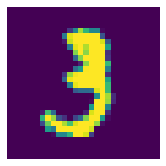

In [245]:
img_size = 28
plt.subplot(1,2,1)
plt.imshow(X_train[10].reshape(img_size, img_size))
plt.axis('off')

In [246]:
train_filter = np.where((Y_train == 0 ) | (Y_train == 1) | (Y_train == 2))
test_filter = np.where((Y_test == 0) | (Y_test == 1) | (Y_test == 2) )
xTrain, yTrain = X_train[train_filter], Y_train[train_filter]
xTest, yTest = X_test[test_filter], Y_test[test_filter]

print('MNIST Dataset Shape:')
print('xTrain: ', str(xTrain.shape))
print('yTrain: ', str(yTrain.shape))

MNIST Dataset Shape:
xTrain:  (18623, 28, 28)
yTrain:  (18623,)


In [247]:
x_train = xTrain.reshape(xTrain.shape[0], xTrain.shape[1] * xTrain.shape[2])
x_test = xTest.reshape(xTest.shape[0], xTest.shape[1] * xTest.shape[2])
print('Shape : ', x_train.shape)
print('Shape : ', x_test.shape)

Shape :  (18623, 784)
Shape :  (3147, 784)


In [248]:
xTrain = x_train.T
yTrain = yTrain.reshape(18623,1)

print('xTrain shape : ', xTrain.shape)
print('yTrain shape : ', yTrain.shape)

xTrain shape :  (784, 18623)
yTrain shape :  (18623, 1)


In [249]:
#enc = preprocessing.OneHotEncoder()
# 2. FIT
#enc.fit(yTrain)
# 3. Transform
#onehotlabels = enc.transform(yTrain).toarray()
#onehotlabels.shape#

In [250]:
#y_enc = (np.arange(np.max(yTrain) + 1) == yTrain[:, None]).astype(float)
#print('one-hot encoding:\n', y_enc.shape)

In [251]:
w = np.full((784,3), 0.001)
print(w.shape)

(784, 3)


In [252]:
#scores = np.dot(w.T,x_Train)
#print(scores.shape)
#prob = softmax(scores)
#print(np.log(prob.T))
#print(prob.shape)
#print(yTrain.shape)
#print((yTrain - prob).shape)
#print(x_Train.shape)
#loss = (-1 / y_enc.shape[0]) * np.sum(np.mat(y_enc.shape[0]) * np.log(prob)) + (1/2)*np.sum(w*w)
#loss

In [253]:

#(((-1 / yTrain.shape[0]) * np.dot(x_Train,(yTrain - prob.T)) ) + (0.1)*w).shape
#loss = (-1 / yTrain.shape[0]) * np.sum(np.mat(yTrain) * np.log(prob)) + (0.1/2) * np.sum(w*w)
#loss

In [254]:
def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm

In [255]:
#z = softmax(scores)
#print(z)
#yTrain.shape[0]
#xTrain.shape[0]

In [262]:
def getLoss(w,xTrain,yTrain,lam):
    scores = np.dot(w.T,xTrain)#Then we compute raw class scores given our input and current weights
    enc = preprocessing.OneHotEncoder()
    enc.fit(yTrain)
    y = enc.transform(yTrain).toarray()
    prob = softmax(scores) #Next we perform a softmax on these scores to get their probabilities
    loss = -1 * np.sum(yTrain.T * np.log(prob))
    #loss = (-1 / yTrain.shape[0]) * np.sum(np.mat(y.T) * np.log(prob.T)) + (lam/2)*np.sum(w*w) #We then find the loss of the probabilities
    grad = (-1 / yTrain.shape[0]) * np.dot(xTrain,(y - prob.T)) + lam*w #And compute the gradient for that loss
    return loss,grad

In [263]:
#loss,grad = getLoss(w,x_Train,yTrain,lam = 0.1)
#print('loss : ', loss)
#print('grad : ', grad)
#print(grad.shape)

In [264]:
losses = []
iterations = 5
learningRate = 0.1
for i in range(iterations):
    loss,grad = getLoss(w,xTrain,yTrain,lam = 0.1)
    losses.append(loss)
    w = w - (learningRate * grad)
#    if w.any() < 0:
#        w = -w
#    else:
#        w
    print('w : ',w[2])
    print('grad : ',grad[2])
    print('loss : ',loss)

w :  [nan nan nan]
grad :  [nan nan nan]
loss :  nan
w :  [nan nan nan]
grad :  [nan nan nan]
loss :  nan
w :  [nan nan nan]
grad :  [nan nan nan]
loss :  nan
w :  [nan nan nan]
grad :  [nan nan nan]
loss :  nan
w :  [nan nan nan]
grad :  [nan nan nan]
loss :  nan
